## Your Name:
## The project I attempted was: (1) Tabular, (2) Image, (3) Text, (4) Time-series
(please delete as appropriate)

# CSC8111 Coursework Specification

For this coursework you will perform **THREE** short questions which cover the breadth of the machine learning module along with attempting **ONE** of the four longer project-style questions. All of the short tasks and longer project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

The learning objectives of these short questions are:
- To demonstrate a wide-range of machine learning skills.
- To be able to apply the most appropriate approach at the right time.



---
## Question 1: Classification (10 marks)

Load the dataset below, where X and y are the feature (input) variables and target (output) variable. Based on this dataset, build TWO classifiers using different machine learning approaches to predict the two classes in the target variable. You are free to use any appropriate machine learning models and libraries, but you need to split the dataset into training and test sets and optimise the model's hyperparameters (e.g. using GridSearchCV()). As a result, the performance metrics of the best classifier should be reported over the test set. Please follow the steps below to complete the code.

The dataset is available at:
https://ncl.instructure.com/courses/53509/files/7659751?wrap=1 and
https://ncl.instructure.com/courses/53509/files/7659755?wrap=1


## Set up the environment and load the dataset

In [3]:
# just run this cell, don't change the code
import numpy as np
from numpy import loadtxt
X = loadtxt('cls_X.csv', delimiter=',')
y = loadtxt('cls_y.csv', delimiter=',')

## Q1.1 Split the data into training and test sets (20% for testing)

In [6]:
# write your code below to replace the ellipsis "..."
...
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 42)

## Q1.2 Create your first classifier

#### Q1.2.1 First, make an attempt by using an appropriate machine learning method without optimising the hyperparameter(s). Report the model accuracy over the test set (i.e. test accuracy).

In [10]:
# write your code below to replace the ellipsis "..."
...
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC()

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 88.75%


#### Q1.2.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your first classifier and print out its test accuracy.

In [24]:
# write your code below to replace the ellipsis "..."
...
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1, 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 10],
    # 'C': [0.001, 0.01, 0.1, 1, 10, 100],
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10],
    # 'degree': [2, 3, 4, 5],
    # 'coef0': [0, 1, 2, 5, 10],
    # 'shrinking': [True, False],
    # 'probability': [True, False],
    # 'tol': [1e-4, 1e-3, 1e-2],
    # 'class_weight': [None, 'balanced'],
    # 'max_iter': [100, 500, 1000, -1]
}

svm_grid = SVC()

grid_search = GridSearchCV(svm_grid, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm = SVC(**best_params)

best_svm.fit(X_train, y_train)
best_svm_predictions = best_svm.predict(X_test)

best_svm_score = accuracy_score(y_test, best_svm_predictions)
best_svm_score

print("Best SVM Accuracy: {:.2f}%".format(best_svm_score * 100))

C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best SVM Accuracy: 87.50%


## Q1.3 Create your second classifier

#### Q1.3.1 First, without optimising the hyperparameter(s), make an attempt by using a different machine learning method to the first classifier. Report the model accuracy over the test set (i.e. test accuracy).

In [7]:
# write your code below to replace the ellipsis "..."
...
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_score = accuracy_score(y_test, rf_predictions)
rf_score

0.85

#### Q1.3.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your second classifier and print out its test accuracy.



In [8]:
# write your code below to replace the ellipsis "..."
...
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_random = random_search.best_params_
rf_with_params_random = random_search.best_estimator_

# Make predictions on the test set using the best model
rf_predictions_random = rf_with_params_random.predict(X_test)

# Calculate accuracy score
rf_score_random = accuracy_score(y_test, rf_predictions_random)

# Print the best parameters and the accuracy score
print("Best Hyperparameters (RandomizedSearchCV):", best_params_random)
print("Random Forest Accuracy (RandomizedSearchCV):", rf_score_random)

Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest Accuracy (RandomizedSearchCV): 0.825


## Q1.4 Report the precision, recall, f1 score and confusion matrix on the best of the two classifiers

In [46]:
# write your code below to replace the ellipsis "..."
...


0.8625

---
## Question 2: Regression (10 marks)

In this question you are given a simple dataset which you will perform regression on to predict values. You will build TWO Regression models and then take the best one and perform hyperparameter tuning on it.

## Set up the environment

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

## Read in the data

You'll need to download the data.csv file from https://ncl.instructure.com/courses/53509/files/7657710?wrap=1 and upload it to your Google Drive. I placed it in a folder called data. Then you need to mount your Google Drive in Colab (cell below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Then read in the data

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/data/data.csv', delimiter=',')
print(data)

## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [ ]:
# your answer here

## Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [ ]:
# your answer here

## Q2.3 Use TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

In [ ]:
# your answer here

Q2.3.2 Regression approach 2

In [ ]:
# your answer here

## Q2.4 Optimise the hyperparameters

Take your best Regression approach from above and identify the best hyperparameters. Note as some Regression approaches have many hyperparameters you may limit yourself here to just THREE.

Q2.4.1 Search for the best hyperparameters

In [ ]:
# your answer here

Q2.4.2 Output the best hyperparameters found

In [ ]:
# your answer here

Q2.4.3 Show the results for the best model

In [ ]:
# your answer here

---
## Question 3: Deep Learning (10 marks)

Q3.1 For MNIST dataset, implement a deep learning model with 3 hidden layers with layer size: 128, 256, 50.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [ ]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'
# ...

Add code to output your network structure

In [ ]:
# your code here

Train the model for just two epochs to show it works. All code provided - just run.

In [ ]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch,
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=1)

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

Q 3.2 For MNIST dataset, implement a CNN model with only one 2D CNN layer as the hidden layer.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Write down your code about the CNN model of Q3.2 here
# you should call your model 'model'
# ...

Add code to output your network structure

In [ ]:
# your code here

We just train for two epochs to demonstrate that the network does work. Just run it.

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

---
---
---
#Mini-projects: Introduction

The remainder of this document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **ONE** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick ONE out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

In [3]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 660.6 kB/s eta 0:00:01
   ----------------------------- ---------- 174.1/235.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  235.5/235.6 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install imbalanced-learn xgboost

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load the dataset
data = pd.read_csv('fars.csv')

# Identify features and target variable
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
y = data.iloc[:, -1]

# Exclude non-numeric columns for scaling
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Data Normalization
print("Data normalization in progress...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data normalization completed.")

# Feature Selection
print("Feature selection in progress...")
selector = SelectKBest(f_classif, k=5)  # Select top 5 features based on ANOVA F-statistic
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
print("Feature selection completed.")

# Model Selection and Hyperparameter Tuning using GridSearchCV
models = {
    'RandomForest': RandomForestClassifier(),
    # 'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    # 'XGBoost': XGBClassifier()
}

param_grids = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    # 'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    # 'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}
}

best_models = {}

for model_name, model in tqdm(models.items(), desc='Model Progress'):
    print(f"\nTraining {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_selected, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} training completed.")

# Model Evaluation
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")
    print(f"{model_name} evaluation completed.")


Data normalization in progress...
Data normalization completed.
Feature selection in progress...
Feature selection completed.


Model Progress:   0%|                                                                            | 0/2 [00:00<?, ?it/s]


Training RandomForest...


Model Progress:  50%|█████████████████████████████████▌                                 | 1/2 [03:06<03:06, 186.76s/it]

RandomForest training completed.

Training KNN...


Model Progress: 100%|███████████████████████████████████████████████████████████████████| 2/2 [03:55<00:00, 117.88s/it]

KNN training completed.

Evaluating RandomForest...



C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

Model: RandomForest
Accuracy: 0.4840
Classification Report:
                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       0.65      0.80      0.72      8473
           Incapaciting_Injury       0.28      0.20      0.23      3061
      Injured_Severity_Unknown       1.00      0.01      0.02        79
                     No_Injury       0.31      0.57      0.40      3989
Nonincapaciting_Evident_Injury       0.31      0.00      0.00      2743
               Possible_Injury       0.31      0.00      0.00      1673
                       Unknown       0.53      0.27      0.36       174

                      accuracy                           0.48     20194
                     macro avg       0.42      0.23      0.22     20194
                  weighted avg       0.45      0.48      0.42     20194



RandomForest evaluation completed.

Evaluating KNN...


C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: KNN
Accuracy: 0.4342
Classification Report:
                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       0.56      0.81      0.67      8473
           Incapaciting_Injury       0.23      0.18      0.20      3061
      Injured_Severity_Unknown       0.00      0.00      0.00        79
                     No_Injury       0.28      0.22      0.24      3989
Nonincapaciting_Evident_Injury       0.20      0.13      0.16      2743
               Possible_Injury       0.13      0.03      0.05      1673
                       Unknown       0.24      0.57      0.33       174

                      accuracy                           0.43     20194
                     macro avg       0.20      0.24      0.21     20194
                  weighted avg       0.37      0.43      0.39     20194



KNN evaluation completed.


C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hi

---
---
## Project 2: Image dataset (70 marks)

The FMNISTMash dataset is an extension to the FMNIST dataset. In each 3-colour channel image there is one FMNIST image in each channel (see example below). The idea is to predict the number of unique classes in the three channels (0 - all images are of the same class, 1 - two different classes, 2 - three different classes). So for the example image there is a top and two jackets so lable is 1. Please download the data from:

|Data| URL|
|---|------|
|Train X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Train y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Validate X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_x.npy |
| Validate y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_y.npy |
| Test X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_x.npy |
| Test y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_y.npy |

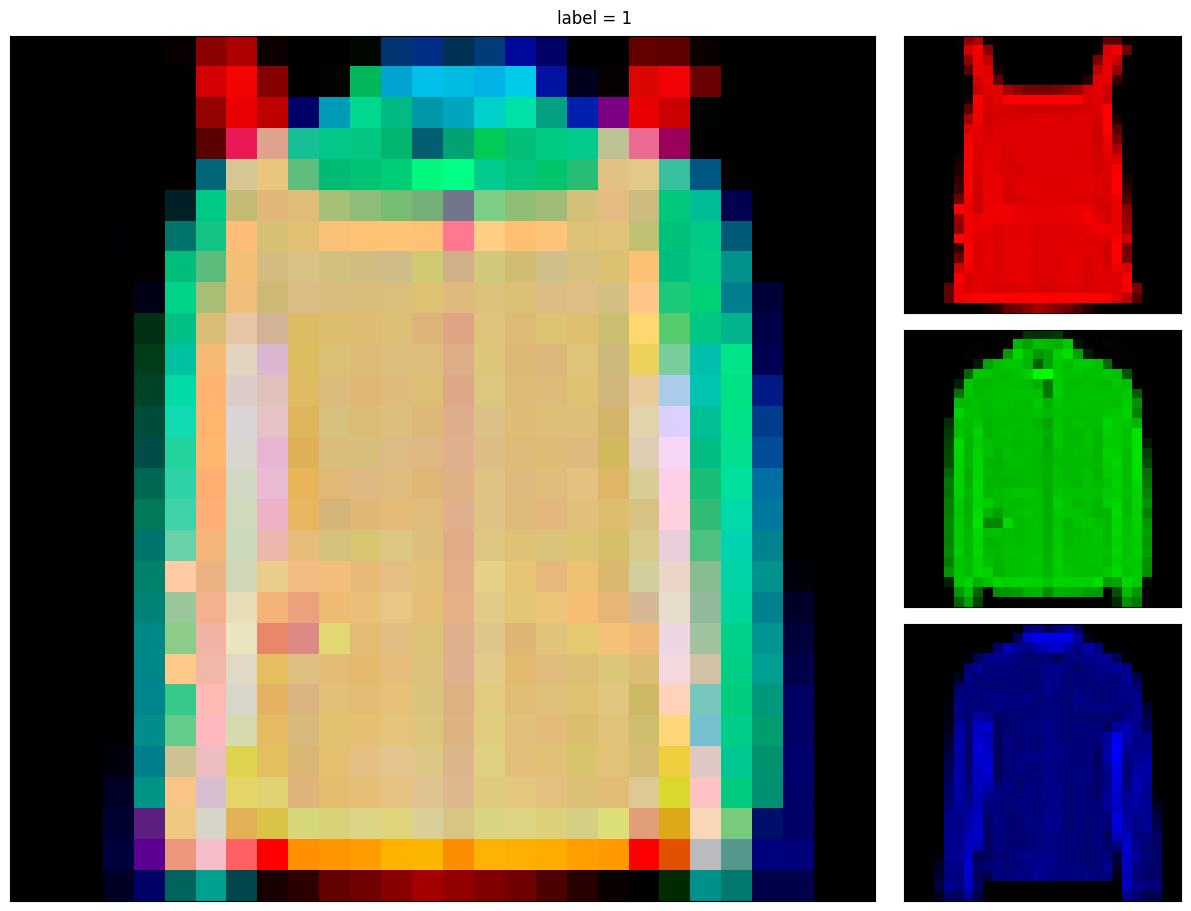
Figure 1: Example image from the FMNISTMash dataset, class label is 1

Your task is to produce TWO models for predicting the class of the image. Note: you can do ONE model which splits the image into its separate colour channels and performs a classification on them separately, but the other MUST work on all three chanels together.

Some hints:
- The code below shows you how to load and view the data.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it. Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

To load the data, we reccomend storing it in your Google Drive, this means you won't need to load it into the local colab storage every time you open the notebook.

The following import will allow your notebook to connect to Google Drive. When you run this cell a seperate window will pop up asking you to grant Drive access to colab. Grant it access to the account which contains FMNISTMash

## Load the data

The dataset is stored as six Numpy files, so to load them we will need to import Numpy. Before loading each file into its own vaiable.

**Note: you'll need to change the location of the file to wherever you stroed your files.**

In [ ]:
import numpy as np

train_x = np.load('/content/drive/MyDrive/data/FMNISTMash/train_x.npy', allow_pickle = True)
train_y = np.load('/content/drive/MyDrive/data/FMNISTMash/train_y.npy', allow_pickle = True)
valid_x = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_x.npy', allow_pickle = True)
valid_y = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_y.npy', allow_pickle = True)
test_x = np.load('/content/drive/MyDrive/data/FMNISTMash/test_x.npy', allow_pickle = True)
test_y = np.load('/content/drive/MyDrive/data/FMNISTMash/test_y.npy', allow_pickle = True)

## Check the shape of the data
Make sure the data is loaded and in the shape that you expect, FMNISTMash has 50,000 training images, 10,000 validation images, and 10,000 testing images.

In [ ]:
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_x shape: {valid_x.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (50000, 3, 28, 28)
train_y shape: (50000,)
valid_x shape: (10000, 3, 28, 28)
valid_y shape: (10000,)
test_x shape: (10000, 3, 28, 28)
test_y shape: (10000,)


## Displaying the Images

### Displaying the single image

To display the images we are going to be using MatPlotLib, so we need to import that, standard practice is to import it as plt

In [ ]:
import matplotlib.pyplot as plt

The following two functions aren't necessary, they simply remove the axis ticks and numbers from the rendered image and perform some normalisation to the image.

In [ ]:
def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

In [ ]:
def image_normalisation(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

We construct the figure using plt, pyplot expects the colour channel to be last, the data is saved in a channels_first format so needs to be converted which is what we used np.move_axis for.

In [ ]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

## Pick a random example and plot it

We want to plot a random image, so we import random and pick a random index using the number of images in train_x as a limit.

In [ ]:
import random

ri = random.randrange(train_x.shape[0])

We now render the image, the label indicates how many different FMNIST classes appear in the image.

- 0 = All images are the same class
- 1 = Two images share the same class
- 2 = All images are from different classes

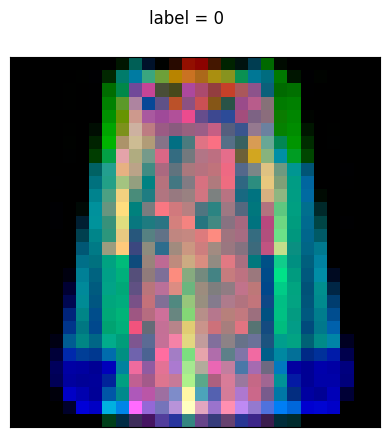

In [ ]:
display_image(train_x[ri], train_y[ri])

## Splitting the Image

This next section is just to make the dataset easier to understand. We will display the image, and then the three images that make it up seperately.

In [ ]:
def show_mnist_examples(x, y):
  fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
  gs = fig.add_gridspec(3,4)
  main_ax = fig.add_subplot(gs[:3,:3])
  fig.suptitle('label = '+ str(y))
  main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
  disable_ax_ticks(main_ax)

  for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalisation(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
  plt.show()

Hopefully, you will see the same image rendered early along with the images in the respective colour channels, and you should be able to see which ones share a class from FMNIST and which ones differ. Careful though, as some classes are similar to others.

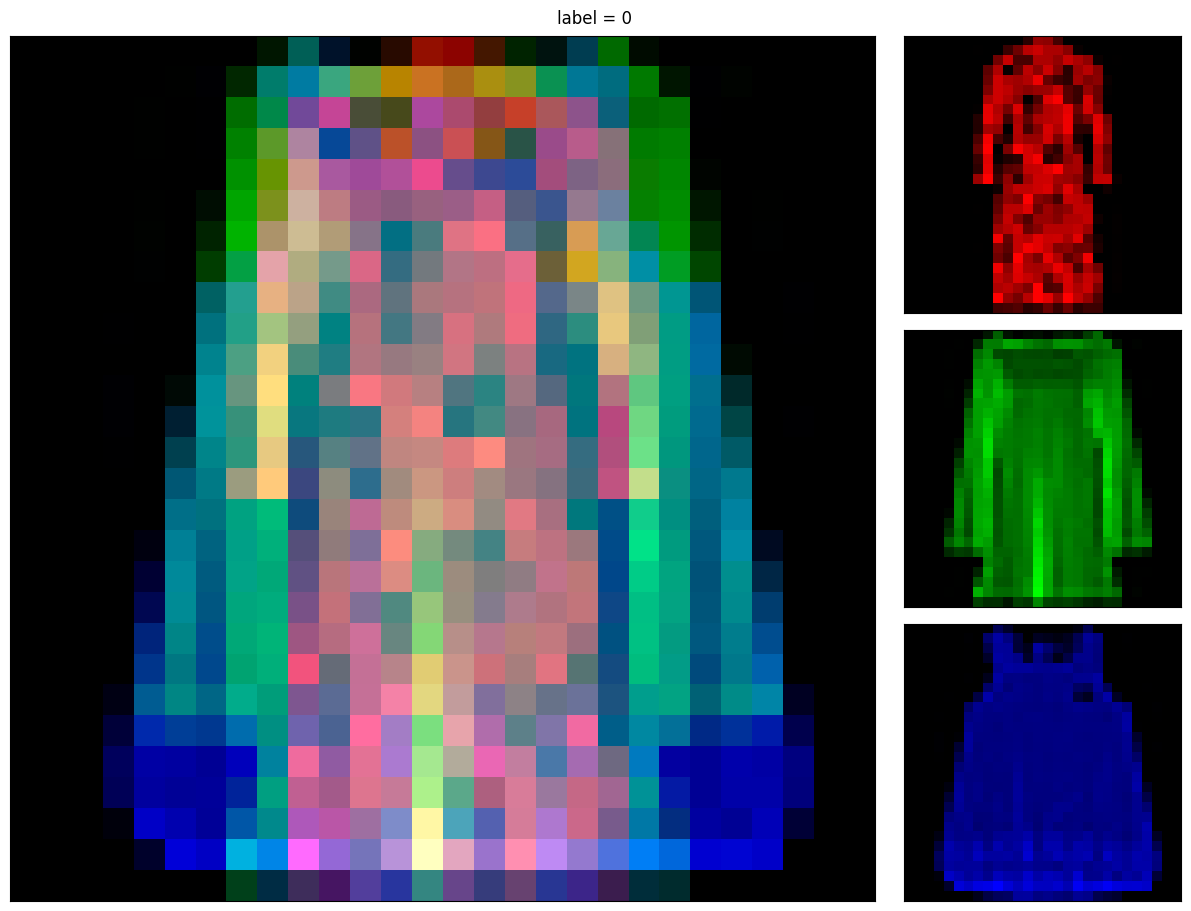

In [ ]:
show_mnist_examples(train_x[ri], train_y[ri])

## Your answer below

---
---
## Project 3: Text dataset (70 marks)

Dataset: sentiment analysis dataset (on canvas: (https://ncl.instructure.com/courses/48554/files/6271480?wrap=1), (https://ncl.instructure.com/courses/48554/files/6271483?wrap=1), (https://ncl.instructure.com/courses/48554/files/6271533?wrap=1)).

Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.

## Your answer below


---
---
## Project 4: Time-serise dataset (70 marks)

The Weather dataset is a time-series dataset collected by a Raspberry Pi computer at a home in Newcastle. It contains a bunch of different features about the weather collected over an approximate 12-month period. The features are as follows:

| Column no | Feature                                                  |
|-----------|----------------------------------------------------------|
|         1 | Date and time in standard Linux format                   |
|         2 | Temperature from the first internal sensor (Celsius)     |
|         3 | Outside temperature (Celsius)                            |
|         4 | CPU Temperature (Celsius)                                |
|         5 | Count (always 1)                                         |
|         6 | Temperature from the second internal sensor (Celsius)    |
|         7 | Air Pressure (mmHg)                                      |
|         8 | Humidity (percentage)                                    |

Readings are measured in one-minute intervals between November 2021 and December 2022. Your task is to try and predict future values 5, 10, 15, 30 minutes into the future along with 1, 2, 6 and 12 hours into the future. I.e. given a time-sequence of measurements before 10:20am on Friday 3rd June 2022 how accurately can you predict the values for 10:25, 10:30, 10:35 and 10:50am and for 11:20, 12:20, 16:20 and 22:20. You can do this for any of the 6 weather features (not date or count). You should separate out a test set of the last 2 months of data (you need to have a continuous and separate test set to prevent leakage between training and testing).

The dataset can be downloaded from:
http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/weather.csv

Some hints:
- There is some code below which shows you how to load and view the data to get you started.
- In order to score top marks for this dataset you should demonstrate multiple models, at least one of them should not use Deep Learning.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it.
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

## Access to the files

The file is available from: http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/log.txt

You can upload the file each time you use them, but this might take some time as they are quite large. An eisier option is to uploade them to a Google drive folder and mount this.

Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb

In the code below I have created a folder in Google drive called data and placed the file above in it.

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

## Load the data

The data is stored in mumpy data files. You can use numpy.load() to read these in.

**Note: you'll need to change the location of the file to wherever you stored your files.**

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('/content/drive/MyDrive/data/log.txt', delimiter=',')

In [ ]:
print(data)

## Data structure

The columns are:
0. Date and time
1. Inside temperature 1
2. Outside temperature
3. CPU Temperature
4. Count
5. Inside temperature 2
6. Air Pressure (mmHg)
7. Humidity (%)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(data[:, [1]])
plt.plot(data[:, [2]])
plt.plot(data[:, [3]])
plt.plot(data[:, [4]])
plt.plot(data[:, [5]])
plt.plot(data[:, [6]])
plt.plot(data[:, [7]])

## Your answer below